In [188]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [189]:
x1 = np.array([2,3,4,5,6,7,8,9,10])
y1 = np.array([1,3,6,9,11,13,15,17, 20])
x1 = x1.astype('float64')
y1 = y1.astype('float64')


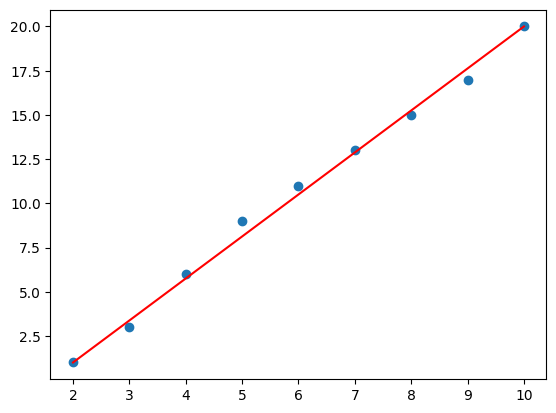

In [190]:
plt.scatter(x1,y1)
plt.plot([min(x1),max(x1)], [min(y1), max(y1)], color = 'red')

In [191]:
beta1 = np.sum(((x1 - np.mean(x1)) * (y1 - np.mean(y1)))) / np.sum((x1 - np.mean(x1)) ** 2)
beta0 = (np.mean(y1) - (beta1 * np.mean(x1)))

In [192]:
print(beta1, beta0)

2.3333333333333335 -3.4444444444444446


In [193]:
def pred(x):
    global beta1, beta0
    return float(beta1 * x + beta0)
pred(7)
y_preds = []
for i in x1:
    y_preds.append(pred(i))

In [194]:
print(f'y = {beta1}X + {beta0}')

y = 2.3333333333333335X + -3.4444444444444446


In [195]:
def mse(y1, y_preds):
    return sum((y1 - y_preds)** 2)/len(y1)
mse(y1, y_preds)

np.float64(0.17283950617283944)

In [196]:
def rmse(y1, y_preds):
    return np.sqrt(sum((y1 - y_preds)** 2)/len(y1))
rmse(y1, y_preds)

np.float64(0.41573970964154894)

In [197]:
df = pd.read_csv('salary_data.csv')
X = df['YearsExperience']
y = df['Salary']

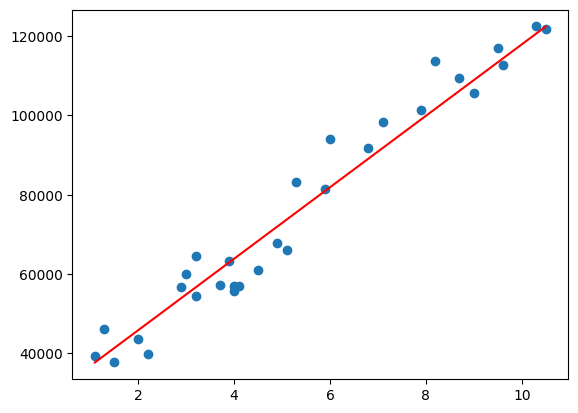

In [198]:
plt.scatter(X,y)
plt.plot([min(X),max(X)], [min(y), max(y)], color = 'red')

In [199]:
beta1 = np.sum(((X - np.mean(X)) * (y - np.mean(y)))) / np.sum((X - np.mean(X)) ** 2)
beta0 = (np.mean(y) - (beta1 * np.mean(X)))

In [200]:
y_preds = []
for i in X:
    y_preds.append(pred(i))
mse(y, y_preds)

31270951.722280968

In [201]:
m = 0
c = 0
L = 0.001
epochs = 10000
n = float(len(x1))

The cost after 0 epochs: 21676517569.11
The cost after 1000 epochs: 128641852.62
The cost after 2000 epochs: 105687860.53
The cost after 3000 epochs: 104322815.95
The cost after 4000 epochs: 104241638.5
The cost after 5000 epochs: 104236810.98
The cost after 6000 epochs: 104236523.89
The cost after 7000 epochs: 104236506.82
The cost after 8000 epochs: 104236505.81
The cost after 9000 epochs: 104236505.74
Coefficient of slope is 9449.96
Intercept is  25792.18


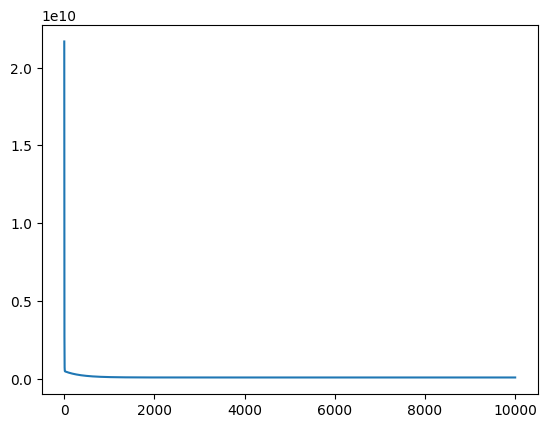

In [202]:
costs = []
for i in range(epochs):
    y_pred = m*X + c
    D_m = (-2/n) * sum(X * (y - y_pred))
    D_c = (-2/n) * sum(y - y_pred)
    m = m - L * D_m
    c = c - L * D_c
    cost = (1/n) * sum((y - y_pred)**2)
    costs.append(cost)
    if i%1000 ==0:
        print(f"The cost after {i} epochs: {round(cost,2)}")
print("Coefficient of slope is", round(m,2))
print("Intercept is ", round(c,2))
plt.plot(costs)
plt.show()

In [203]:
print(f"y for x=4: {m * 4 + c}")

y for x=4: 63592.04227068956


In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.reshape(X, (30,1))
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [209]:
y_pred = model.predict(X)
print("Intercept", model.intercept_)
print("Coefficient", model.coef_)
mse = mean_squared_error(y, y_pred)
print(mse)

Intercept 25792.20019866871
Coefficient [9449.96232146]
31270951.722280968
